In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df =pd.read_csv('FuelConsumption.csv')

In [ ]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
cdf = df[['ENGINESIZE','CYLINDERS','TRANSMISSION','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,AS5,8.5,196
1,2.4,4,M6,9.6,221
2,1.5,4,AV7,5.9,136
3,3.5,6,AS6,11.1,255
4,3.5,6,AS6,10.6,244
5,3.5,6,AS6,10.0,230
6,3.5,6,AS6,10.1,232
7,3.7,6,AS6,11.1,255
8,3.7,6,M6,11.6,267


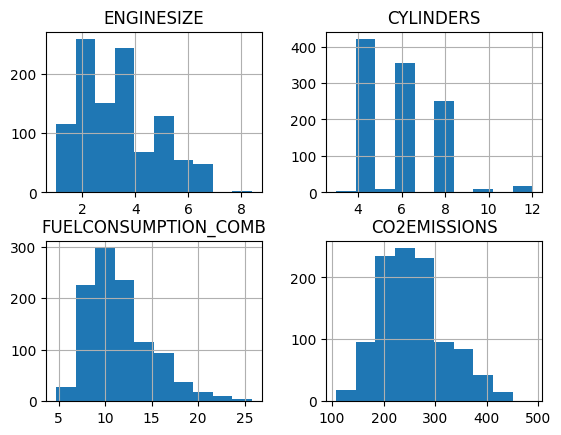

In [ ]:
cdf.hist()
plt.show()

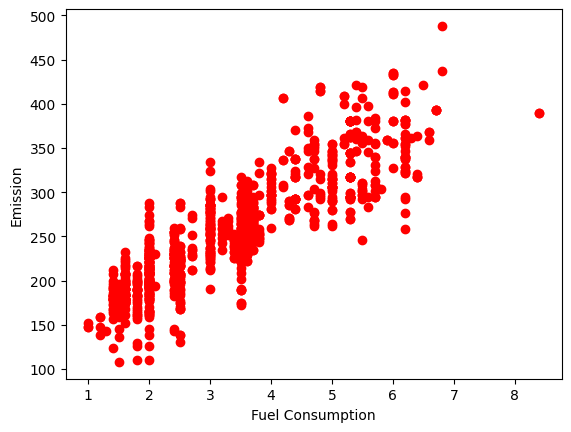

In [ ]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='red')
plt.xlabel("Fuel Consumption")
plt.ylabel("Emission")
plt.show()

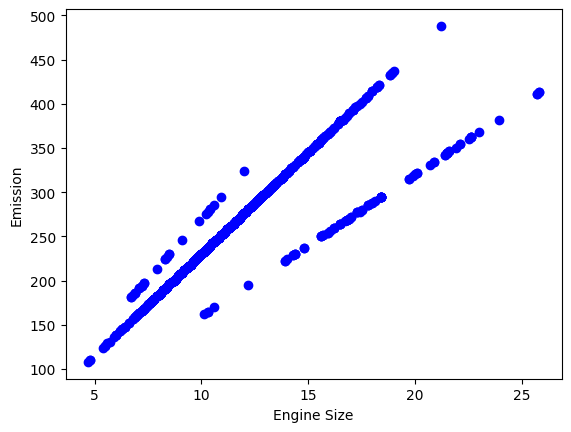

In [ ]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

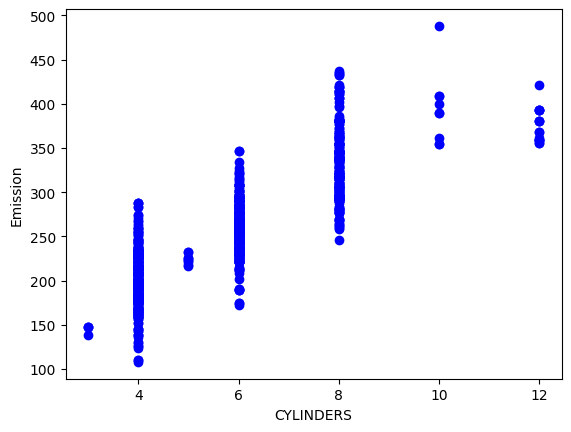

In [ ]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

In [ ]:
mask = np.random.rand(len(df))<=0.8
train = cdf[mask] 
test = cdf[~mask]

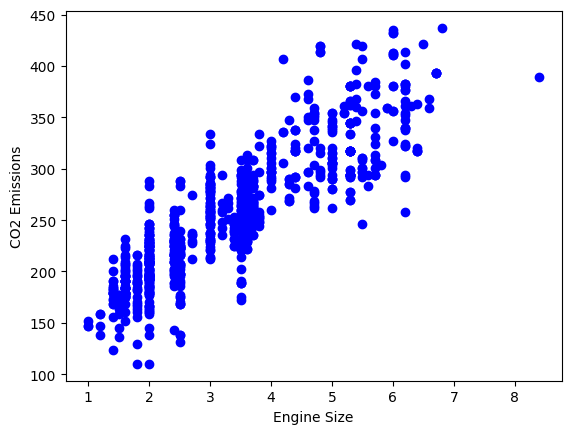

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y =  np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [[38.79974484]]
Intercept: [125.68178876]


Text(0, 0.5, 'CO2 Emissions')

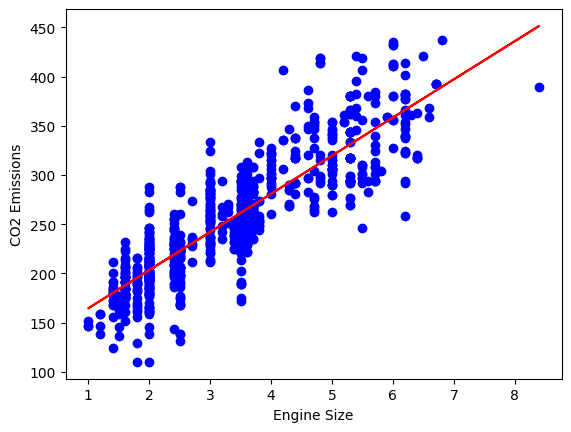

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.intercept_[0]+regr.coef_[0][0]*train_x, '-r')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_pred = regr.predict(test_x)

print(f"Mean Absolute Error : {np.mean(np.absolute(test_y_pred - test_y))} ")
print(f"Mean Squared Error : {np.mean((test_y_pred - test_y) ** 2)} ")
print(f"R2 Score : { r2_score(test_y , test_y_pred)}")


Mean Absolute Error : 23.445422202751974 
Mean Squared Error : 994.5505182606786 
R2 Score : 0.7807227507867448


In [ ]:
train_x1 = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
test_x1 =  np.asanyarray(test[['FUELCONSUMPTION_COMB']])

In [ ]:
from sklearn import linear_model

regr1 =  linear_model.LinearRegression()

regr1.fit(train_x1, train_y)

test_y_pred1 = regr1.predict(test_x1)

In [ ]:
print("Coefficients:" ,regr1.coef_)
print("Intercept : ",regr1.intercept_)

Coefficients: [[15.98594106]]
Intercept :  [70.82127629]


In [ ]:

print(f"Mean Absolute Error : {np.mean(np.absolute(test_y_pred1 - test_y))} ")
print(f"Mean Squared Error : {np.mean((test_y_pred1 - test_y) ** 2)} ")
print(f"R2 Score : { r2_score(test_y , test_y_pred1)}")


Mean Absolute Error : 21.781291707973427 
Mean Squared Error : 876.9887417082712 
R2 Score : 0.8066426236355552


###  MAE is much worse when we train using ENGINESIZE than FUELCONSUMPTION_COMB

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5f662238-92f8-425a-9aac-de47ded02678' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>